In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


In [16]:
record_list = [] # Initialize the array that will hold the list of our records

records = 'mit-bih-dataframes/subject_list.csv' # Get our record list like we did in the initial extraction
with open(records) as rfile:# Load our records into the array
    for record in rfile:
        record = record[0:-1] # The -1 removes the newline ("\n") character from the string
        record_list.append(record)

In [17]:
dfdic = {}
for idx, x in enumerate(record_list):
    dfdic[x] = pd.read_csv('mit-bih-features/'+x+ '.csv', index_col=0)

In [18]:
subject_df = pd.DataFrame()
for idx, x in enumerate(record_list):
    subject_df = pd.concat([subject_df, dfdic[x]])
subject_df = subject_df.drop(["Unnamed: 0.1"], axis=1)

In [19]:
subject_df['Mappedrhythmlabels'] = subject_df['rhythmLabel'].map({'Normal':0, 'Other':0, 'AFIB':1})

In [20]:
subject_df.head()

,subsetID,rhythmLabel,StoS,StoR,StoL,RtoS,RtoR,RtoL,LtoS,LtoR,LtoL,RMS,STD,CoefVar,Range,IQR,MAD,Mappedrhythmlabels
0,04015-0.csv,Normal,0.200000,0.057143,0.028571,0.057143,0.228571,0.142857,0.057143,0.114286,0.114286,156.276998,43.660906,0.248152,155.0,78.00,32.5,0
1,04015-1.csv,Normal,0.000000,0.052632,0.000000,0.052632,0.184211,0.236842,0.000000,0.210526,0.263158,197.783973,57.233572,0.355262,213.0,93.50,55.0,0
2,04015-2.csv,Normal,0.333333,0.083333,0.055556,0.027778,0.305556,0.083333,0.111111,0.000000,0.000000,151.638551,43.820505,0.253179,138.0,72.00,56.0,0
3,04015-3.csv,Normal,0.300000,0.175000,0.000000,0.125000,0.025000,0.125000,0.075000,0.050000,0.125000,157.611865,48.827831,0.318730,167.0,79.00,59.0,0
4,04015-4.csv,Normal,0.090909,0.151515,0.090909,0.030303,0.060606,0.212121,0.212121,0.060606,0.090909,226.855681,53.260256,0.289227,237.0,95.75,66.5,0


[-9.37489575e-01  1.01808093e+01 -1.85364865e+01 -4.97807649e+00
 -4.63256974e+00  2.11981146e+01 -3.36522819e+00  6.95924739e+00
 -4.94408904e+00  1.63733030e-02 -2.96493110e-01  9.11180003e+00
  3.01561442e-02  7.61074116e-02  1.18200659e-02]


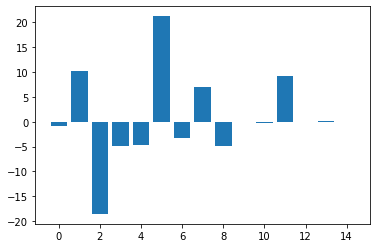

In [21]:
#Logistic Regression Feature Importance
X = subject_df.iloc[:, 2:17]
Y = subject_df.iloc[:, -1]

model=LogisticRegression(solver='liblinear')
model.fit(X, Y)

importance=model.coef_[0]
print(importance)
plt.bar(range(len(importance)), importance)
plt.show()

#Code from https://machinelearningmastery.com/calculate-feature-importance-with-python/

[0.01167388 0.05052    0.02002285 0.02781067 0.14200209 0.18860156
 0.00741971 0.06894747 0.01605698 0.05516076 0.0280316  0.09378725
 0.01969731 0.25738951 0.01287836]


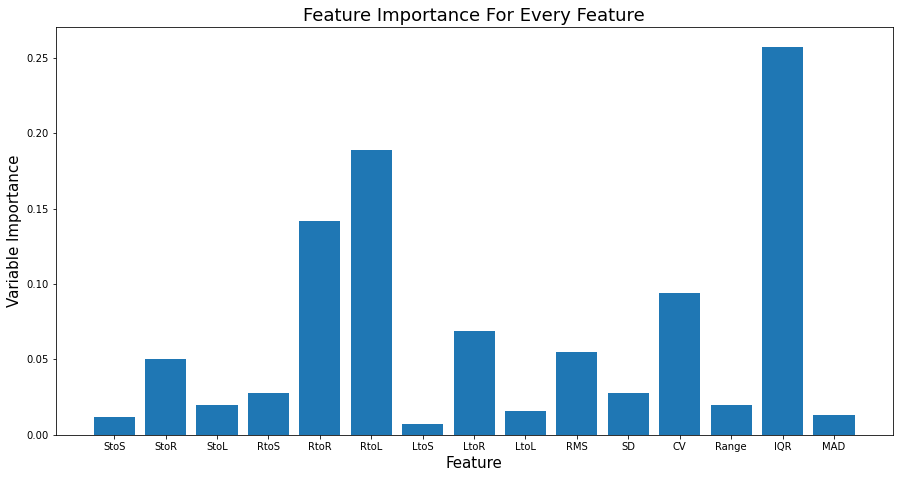

In [37]:
#Random Forest Feature Importance
X = subject_df.iloc[:, 2:17]
Y = subject_df.iloc[:, -1]

model=RandomForestClassifier(max_features=3, random_state=3)
model.fit(X, Y)

importance = model.feature_importances_
print(importance)

features = ['StoS', 'StoR','StoL','RtoS','RtoR','RtoL','LtoS','LtoR','LtoL','RMS','SD','CV','Range','IQR','MAD']
x = np.arange(len(features))

fig, ax = plt.subplots(figsize=(15, 7.5))

ax.bar(range(len(importance)), importance)
ax.set_xlabel('Feature', fontsize=15)
ax.set_ylabel('Variable Importance', fontsize=15)
ax.set_title('Feature Importance For Every Feature', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(features)
plt.show()

#Code from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [23]:
#XGBoost Feature Importance
X = subject_df.iloc[:, 2:17]
Y = subject_df.iloc[:, -1]

model=XGBClassifier()
model.fit(X, Y)

print(model.feature_importances_)
plt.bar(range(len(model.feature_importances)), model.feature_importances_)
plt.show()

#Code from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

NameError: name 'XGBClassifier' is not defined

In [ ]:
X = subject_df.iloc[:, 2:17]
Y = subject_df.iloc[:, -1]

model=XGBClassifier()
model.fit(X, Y)

plot_importance(model)
plt.show()

#Code from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/